In [11]:
%%time
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import flotilla


folder = '/home/obotvinnik/projects/singlecell_pnms/analysis/csvs_for_paper'

metadata = pd.read_csv('{}/metadata.csv'.format(folder), index_col=0)
expression = pd.read_csv('{}/expression.csv'.format(folder), index_col=0)
# splicing = pd.read_csv('{}/splicing.csv'.format(folder), index_col=0)
mapping_stats = pd.read_csv('{}/mapping_stats.csv'.format(folder), index_col=0)

# psi5_psi3 = pd.read_csv('{}/psi5_psi3_combined.csv'.format(folder), index_col=0)

csv_folder = '/home/obotvinnik/projects/singlecell_pnms/analysis/csvs_for_paper/'
psi_df = pd.read_csv('{}/skipped_exon_psi_from_junctions.csv'.format(csv_folder), index_col=0)


print metadata.shape
print expression.shape
# print splicing.shape
print mapping_stats.shape
print psi_df.shape

(214, 9)
(214, 34608)
(214, 35)
(233, 58553)
CPU times: user 25.1 s, sys: 219 ms, total: 25.3 s
Wall time: 25.3 s


In [12]:
# psi5_psi3_metadata = pd.read_csv('{}/psi5_psi3_combined_metadata.csv'.format(folder), index_col=0)
# print psi5_psi3_metadata.shape
# psi5_psi3_metadata.head()

In [13]:
# psi5_psi3 = pd.read_hdf('{}/psi5_psi3_combined.hdf'.format(folder), 'psi', index_col=0)
# print psi5_psi3.shape
# psi5_psi3.head()

In [14]:
psi5_psi3_metadata = pd.read_hdf('{}/psi5_psi3_combined_metadata.hdf'.format(folder), 'metadata', index_col=0)
print psi5_psi3_metadata.shape
psi5_psi3_metadata.head()

(632582, 41)


,chrom,intron_start,intron_stop,strand,intron_motif,annotated,gencode_id,ensembl_id,gene_id,gene_name,...,gerstberger2014_rbp_target_ncrna,gerstberger2014_rbp_target_ribosome,gerstberger2014_rbp_target_trna,gerstberger2014_tf,rbp,ribosomal,ribosomal_subunit,synapse,transcription_factor,intron_length
intron_location,,,,,,,,,,,,,,,,,,,,,
chr1:120933-129054:-|5p,chr1,120933,129054,-,GT/AG,True,ENSG00000238009.2,ENSG00000238009,ENSG00000238009.2,RP11-34P13.7,...,False,False,False,False,False,False,False,False,False,8121
chr1:135767-137718:-|5p,chr1,135767,137718,-,GC/AG,False,ENSG00000237683.5,ENSG00000237683,ENSG00000237683.5,AL627309.1,...,False,False,False,False,False,False,False,False,False,1951
chr1:326417-327587:+|5p,chr1,326417,327587,+,GC/AG,False,"ENSG00000237094.7,ENSG00000250575.1","ENSG00000237094,ENSG00000250575","ENSG00000237094.7,ENSG00000250575.1","RP4-669L17.10,RP4-669L17.8",...,False,False,False,False,False,False,False,False,False,1170
chr1:334298-342391:+|5p,chr1,334298,342391,+,GT/AG,True,ENSG00000237094.7,ENSG00000237094,ENSG00000237094.7,RP4-669L17.10,...,False,False,False,False,False,False,False,False,False,8093
chr1:566538-566579:-|5p,chr1,566538,566579,-,GC/AG,False,ENSG00000230021.3,ENSG00000230021,ENSG00000230021.3,RP5-857K21.4,...,False,False,False,False,False,False,False,False,False,41


## Remove splicing events that are 0 or 1 for all observed samples

Since they're the same for all, they are not "alternatively spliced"

In [15]:
def get_not_alternative(data):
    """Find splicing events which are 0 or 1 for all observed samples --> constitutive, not alternative splicing"""
    not_alternative = ((data == 0)[data.notnull()].all(axis=0) | (data == 1)[data.notnull()].all(axis=0))
    not_alternative_ids = not_alternative[not_alternative].index
    return not_alternative_ids

# splicing_constitutive_ids = get_not_alternative(splicing)
psi_df_constitutive_ids = get_not_alternative(psi_df)

# print len(splicing_constitutive_ids)
print len(psi_df_constitutive_ids)

5361


In [16]:
psi_df_constitutive = psi_df.loc[:, psi_df_constitutive_ids]
print psi_df_constitutive.shape
psi_df_alternative = psi_df.loc[:, ~psi_df.columns.isin(psi_df_constitutive_ids)]
print psi_df_alternative.shape

(233, 5361)
(233, 53192)


In [17]:
psi_df_constitutive

,exon:chr10:101667752-101667851:-@exon:chr10:101659676-101659823:-@exon:chr10:101658500-101658517:-,exon:chr10:102257424-102257550:-@exon:chr10:102256892-102257037:-@exon:chr10:102256015-102256188:-,exon:chr10:102262011-102262241:-@exon:chr10:102259867-102259916:-@exon:chr10:102259281-102259355:-,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102276631-102276717:-,exon:chr10:102706796-102706893:+@exon:chr10:102707517-102707604:+@exon:chr10:102709833-102709964:+,exon:chr10:103902802-103902855:+@exon:chr10:103904007-103904064:+@exon:chr10:103906429-103907149:+,exon:chr10:103919653-103919781:+@exon:chr10:103920209-103920850:+@exon:chr10:103921313-103921419:+,exon:chr10:103919653-103919781:+@exon:chr10:103921313-103921419:+@exon:chr10:103921590-103921682:+,exon:chr10:104111600-104111708:+@exon:chr10:104112215-104112275:+@exon:chr10:104113357-104113411:+,exon:chr10:1042046-1042182:+@exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+,...,exon:chrY:21893658-21893816:-@exon:chrY:21885227-21885319:-@exon:chrY:21883158-21883197:-,exon:chrY:21905048-21905125:-@exon:chrY:21903621-21903743:-@exon:chrY:21903204-21903374:-,exon:chrY:22741494-22741577:+@exon:chrY:22744476-22744579:+@exon:chrY:22749910-22749991:+,exon:chrY:22741494-22741577:+@exon:chrY:22744476-22744579:+@exon:chrY:22749910-22750415:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2734834-2734903:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2734834-2734997:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2734834-2735309:+,exon:chrY:2713687-2713784:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734903:+,exon:chrY:2713687-2713784:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734997:+,exon:chrY:2713687-2713784:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2735309:+
CVN_01,NaN,NaN,NaN,1,NaN,NaN,1,1,NaN,1,...,NaN,NaN,NaN,NaN,1,1,1,1,1,1
CVN_02,NaN,NaN,NaN,1,NaN,NaN,1,1,NaN,1,...,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN
CVN_03,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN
CVN_04,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,1,1,1,1,1,1
CVN_05,NaN,NaN,NaN,1,1,NaN,1,1,NaN,NaN,...,NaN,NaN,1,1,1,1,1,1,1,1
CVN_06,NaN,NaN,NaN,1,NaN,NaN,1,1,NaN,NaN,...,NaN,NaN,1,1,1,1,1,1,1,1
CVN_07,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,1,...,NaN,NaN,1,1,1,1,1,1,1,1
CVN_08,NaN,NaN,NaN,1,NaN,NaN,1,1,NaN,NaN,...,NaN,NaN,1,1,1,1,1,1,1,1
CVN_09,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,1,1,1,1,1,1,1,1
CVN_11,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,...,NaN,1,NaN,NaN,1,1,1,1,1,1


## Create a flotilla study!

2015-09-24 09:27:07	Initializing Study
2015-09-24 09:27:07	Initializing Predictor configuration manager for Study
2015-09-24 09:27:07	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-09-24 09:27:07	Added ExtraTreesClassifier to default predictors
2015-09-24 09:27:07	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-09-24 09:27:07	Added ExtraTreesRegressor to default predictors
2015-09-24 09:27:07	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-09-24 09:27:07	Added GradientBoostingClassifier to default predictors
2015-09-24 09:27:07	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2015-09-24 09:27:07	Added GradientBoostingRegressor to default predictors
2015-09-24 09:27:07	Loading metadata
2015-09-24 09:27:07	Loading species metadata from ~/f

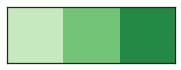

In [18]:
%matplotlib inline

greens = map(mpl.colors.rgb2hex, sns.color_palette('Greens', n_colors=3))
sns.palplot(greens)

lightgreen, mediumgreen, darkgreen = greens

phenotype_to_color = {'MN': greens[2],
                      'NPC': greens[1],
                      'iPSC': greens[0]}
phenotype_to_marker = {'MN': 's',    # square
                       'NPC': '^',   # Triangle
                       'iPSC': 'o'}  # circle
metadata_phenotype_order = ('iPSC', 'NPC', 'MN')

study = flotilla.Study(metadata, expression_data=expression, expression_log_base=2, 
                       expression_plus_one=True,
                       expression_thresh=1,
                       splicing_data=psi_df_alternative,
                       
                       # At least 20 samples per feature (either gene or splicing event)
                       metadata_minimum_samples=20, 
                       mapping_stats_data=mapping_stats,
                       mapping_stats_min_reads=1e6,
                       mapping_stats_number_mapped_col='Uniquely mapped reads number',
                       metadata_phenotype_order=('iPSC', 'NPC', 'MN'), 
                       metadata_phenotype_to_marker=phenotype_to_marker,
                       metadata_phenotype_to_color=phenotype_to_color,
                       species='hg19')

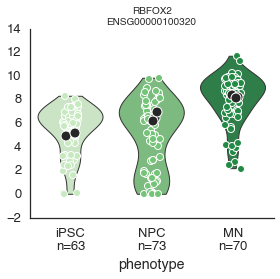

In [34]:
study.plot_gene('RBFOX2')

### Set the psi5 psi3 feature data as the splicing feature data

In [23]:
splicing_metadata = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/skipped_exon_metadata.csv', index_col=0)
study.splicing.feature_expression_id_col = 'one_ensembl_id'
study.splicing.feature_data = splicing_metadata


study.splicing.feature_data.head()

,gencode_id,ensembl_id,gene_name,exon1_length,exon2_length,exon3_length,intron1_length,intron2_length,exon2_divisible_by_3,intron12_length_summed,one_ensembl_id
event_id,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,492,681,148,True,829,ENSG00000107521
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188913-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,487,681,148,True,829,ENSG00000107521
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,70,681,148,True,829,ENSG00000107521
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,ENSG00000107521.14,ENSG00000107521,HPS1,152,161,100,2648,460,False,3108,ENSG00000107521
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,ENSG00000107521.14,ENSG00000107521,HPS1,138,143,152,220,1180,False,1400,ENSG00000107521


In [25]:
cols = study.expression.feature_data.columns.difference(study.splicing.feature_data.columns)
study.splicing.feature_data = study.splicing.feature_data.join(study.expression.feature_data[cols], on='one_ensembl_id')
study.splicing.feature_data.head()

,gencode_id,ensembl_id,gene_name,exon1_length,exon2_length,exon3_length,intron1_length,intron2_length,exon2_divisible_by_3,intron12_length_summed,...,rbp,ribosomal,ribosomal_subunit,synapse,tag,transcript_id,transcript_name,transcript_status,transcript_type,transcription_factor
event_id,,,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,492,681,148,True,829,...,False,False,False,False,ncRNA_host,ENSG00000107521.14,HPS1,KNOWN,protein_coding,False
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188913-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,487,681,148,True,829,...,False,False,False,False,ncRNA_host,ENSG00000107521.14,HPS1,KNOWN,protein_coding,False
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,70,681,148,True,829,...,False,False,False,False,ncRNA_host,ENSG00000107521.14,HPS1,KNOWN,protein_coding,False
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,ENSG00000107521.14,ENSG00000107521,HPS1,152,161,100,2648,460,False,3108,...,False,False,False,False,ncRNA_host,ENSG00000107521.14,HPS1,KNOWN,protein_coding,False
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,ENSG00000107521.14,ENSG00000107521,HPS1,138,143,152,220,1180,False,1400,...,False,False,False,False,ncRNA_host,ENSG00000107521.14,HPS1,KNOWN,protein_coding,False


Assign the filtered splicing data to `data_original` so it gets saved.

### Save the constitutive data

Save the study!

In [27]:
study.save('singlecell_pnm_0.3')

Wrote datapackage to /home/obotvinnik/flotilla_projects/singlecell_pnm_0.3/datapackage.json


In [28]:
study.splicing.maybe_renamed_to_feature_id('PKM')

Index([u'exon:chr15:72499069-72499139:-@exon:chr15:72494795-72494961:-@exon:chr15:72492815-72492996:-',
       u'exon:chr15:72499069-72499139:-@exon:chr15:72494795-72494961:-@exon:chr15:72492849-72492996:-',
       u'exon:chr15:72499069-72499139:-@exon:chr15:72495363-72495529:-@exon:chr15:72492815-72492996:-',
       u'exon:chr15:72499069-72499139:-@exon:chr15:72495363-72495529:-@exon:chr15:72492849-72492996:-',
       u'exon:chr15:72523457-72523531:-@exon:chr15:72513509-72513625:-@exon:chr15:72511284-72511451:-',
       u'exon:chr15:72523457-72523531:-@exon:chr15:72513509-72513625:-@exon:chr15:72511285-72511451:-',
       u'exon:chr15:72523457-72523531:-@exon:chr15:72513509-72513625:-@exon:chr15:72511323-72511451:-'],
      dtype='object')

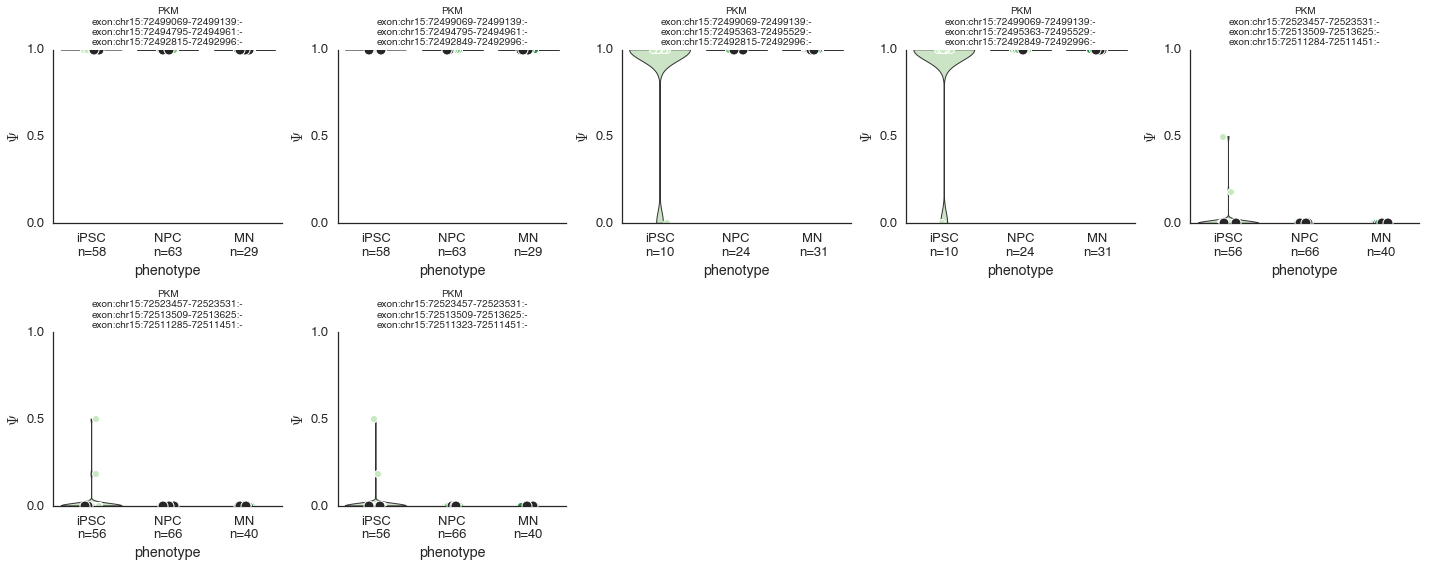

In [29]:
study.plot_event('PKM')

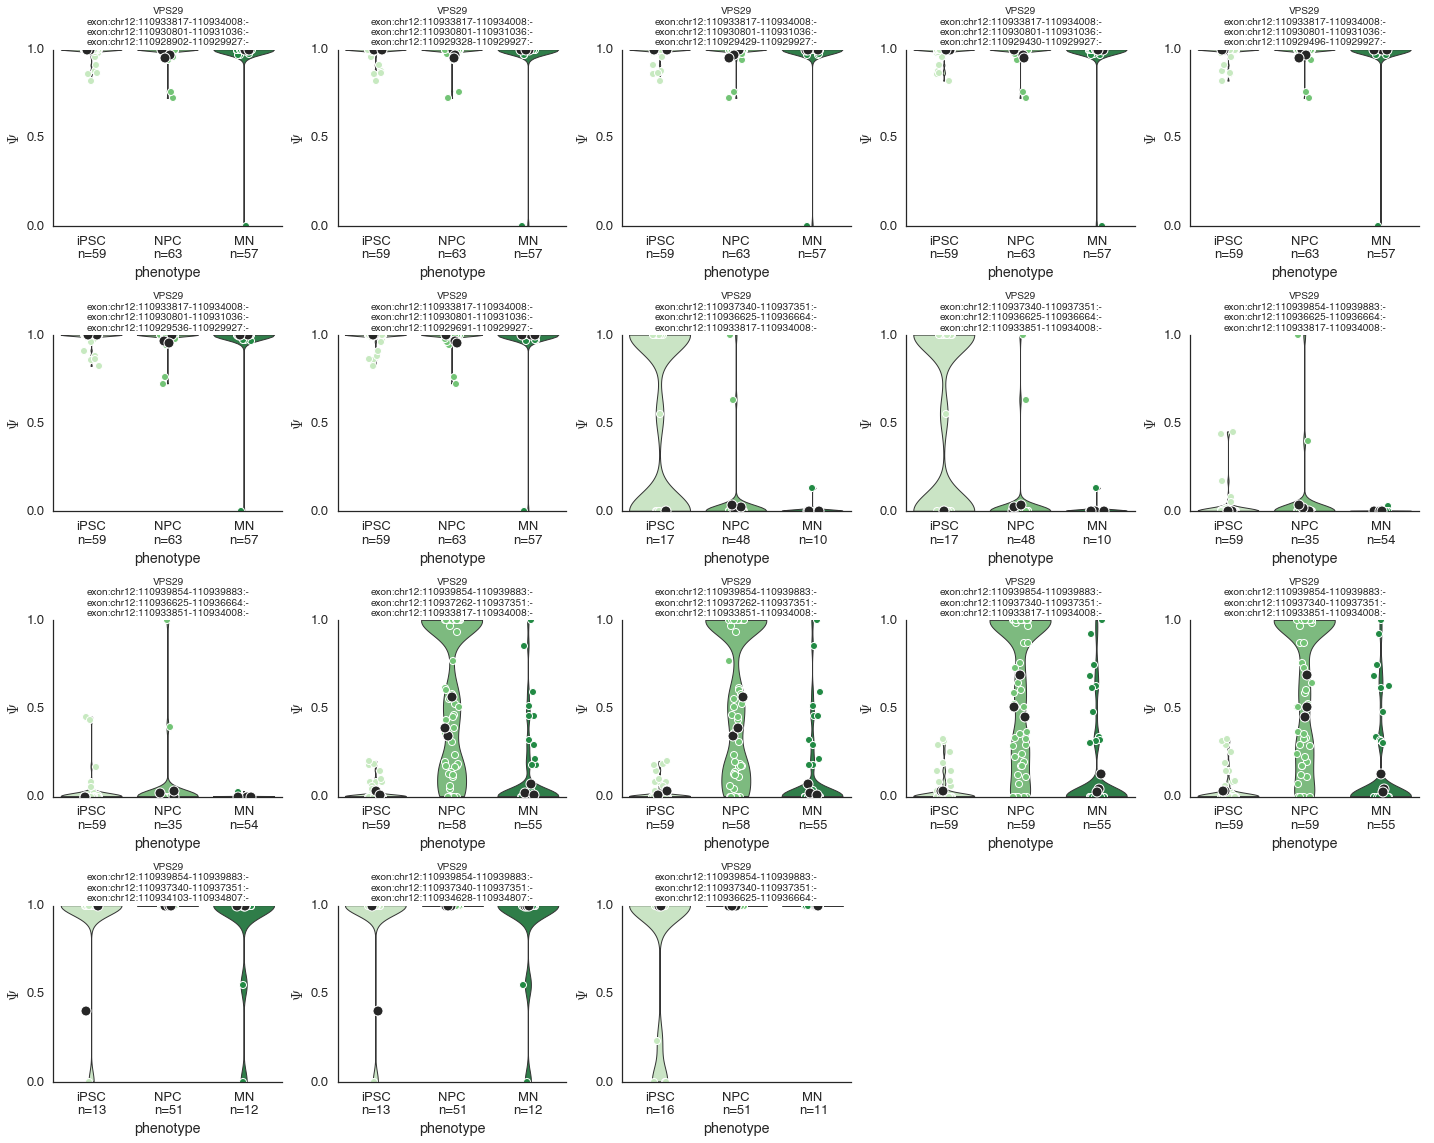

In [35]:
study.plot_event("VPS29")

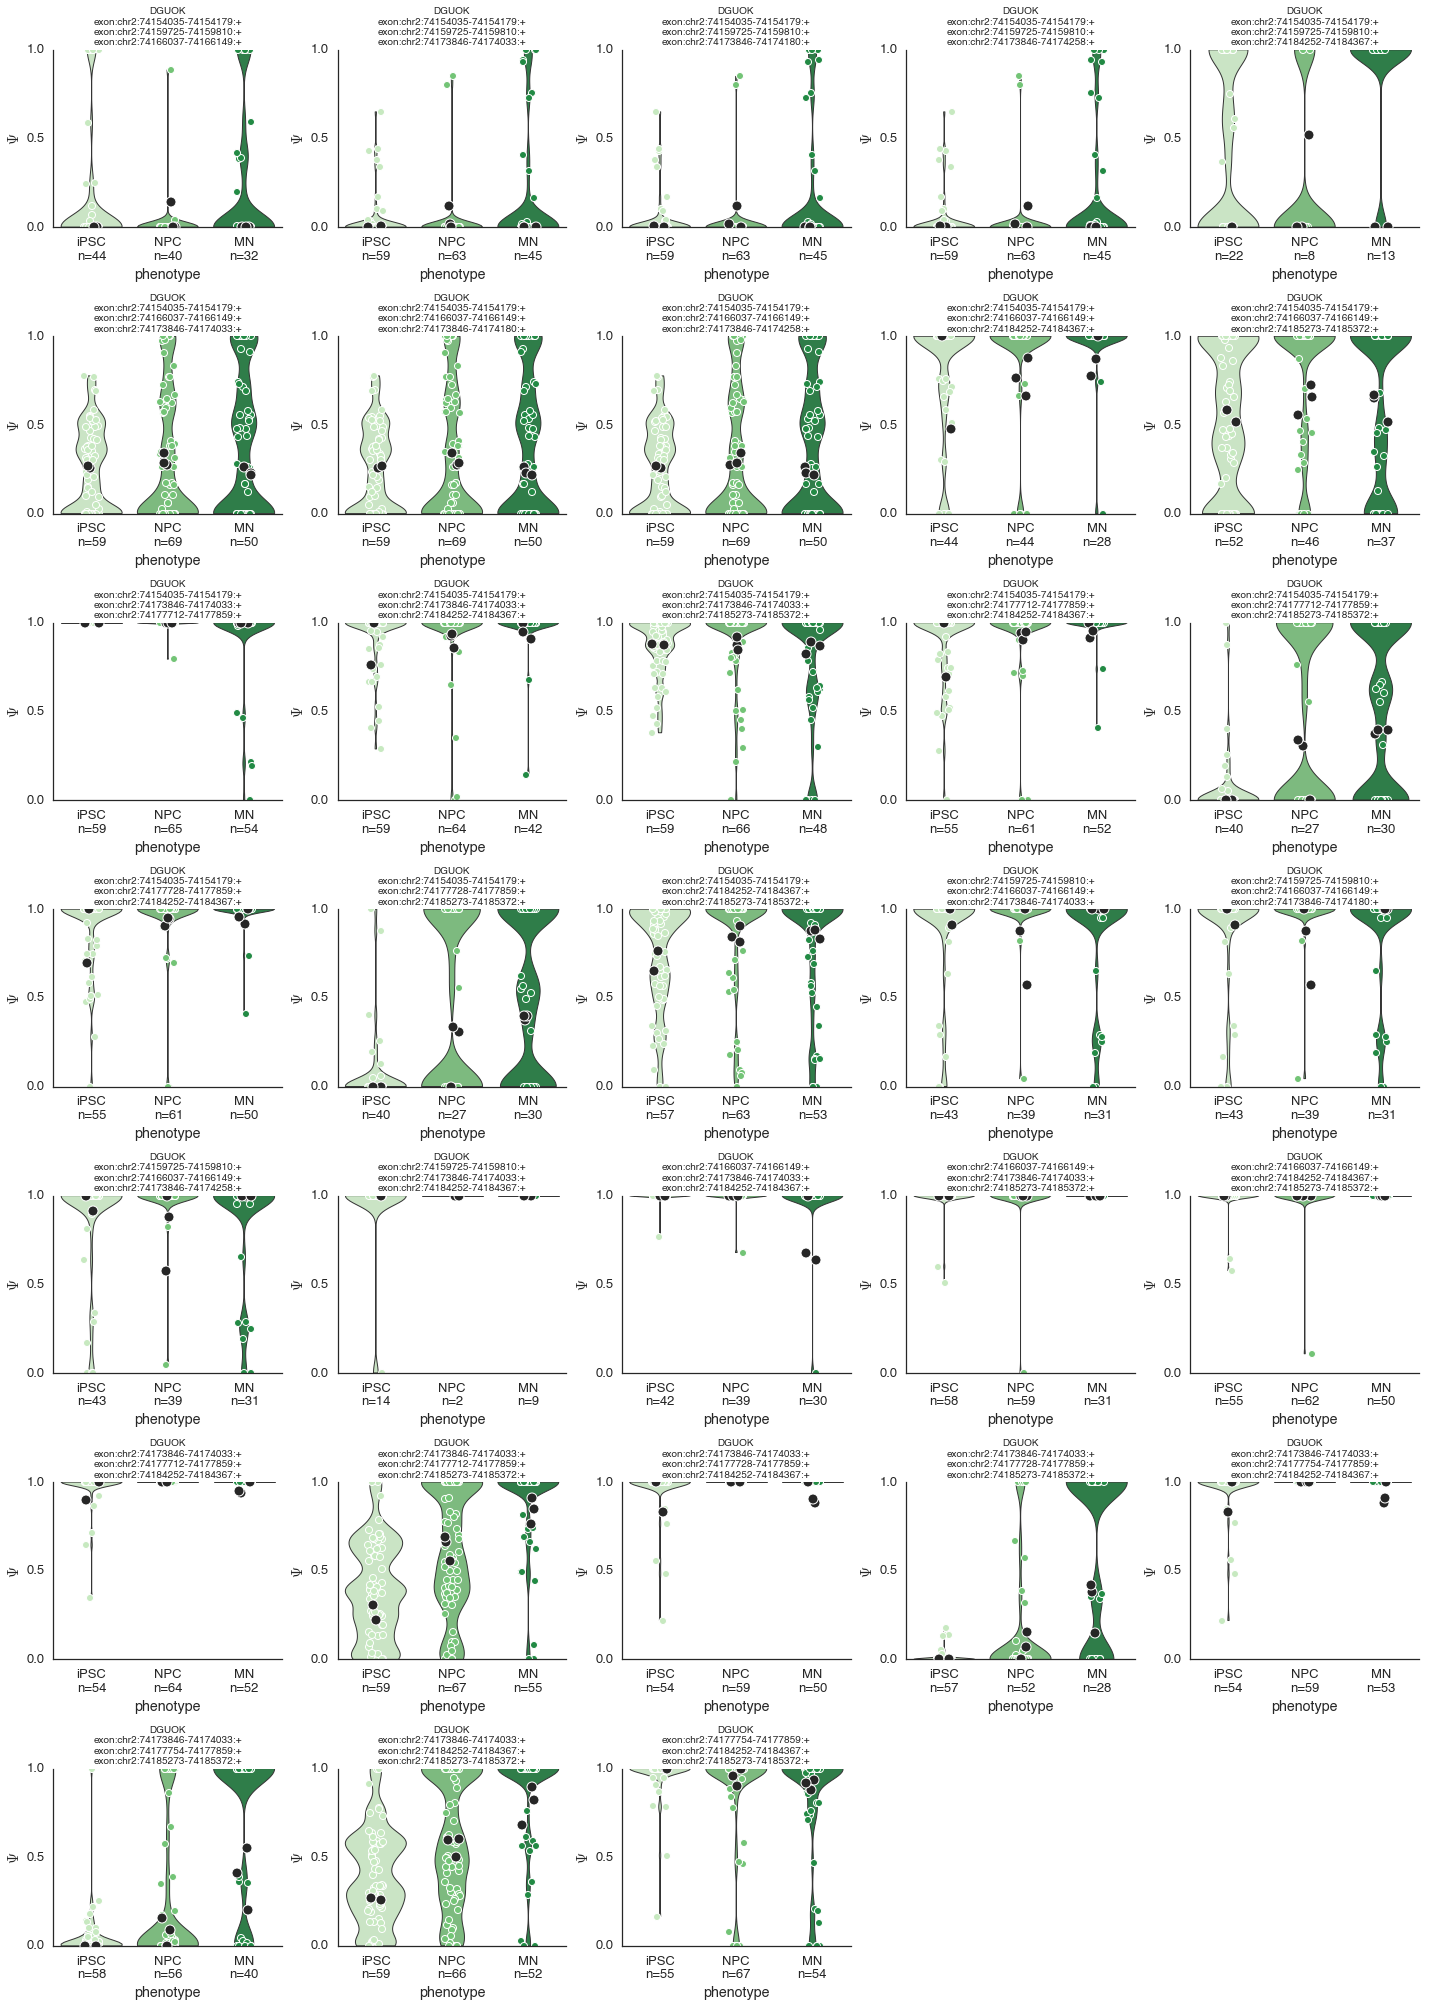

In [30]:
study.plot_event("DGUOK")

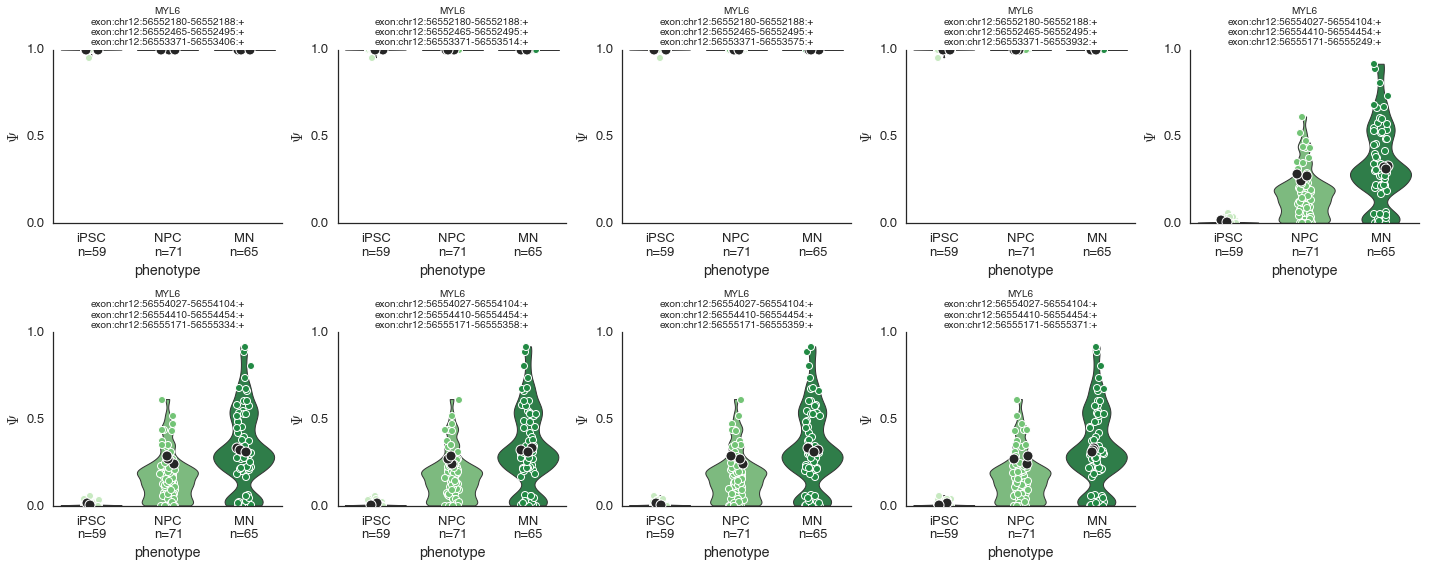

In [31]:
study.plot_event("MYL6")

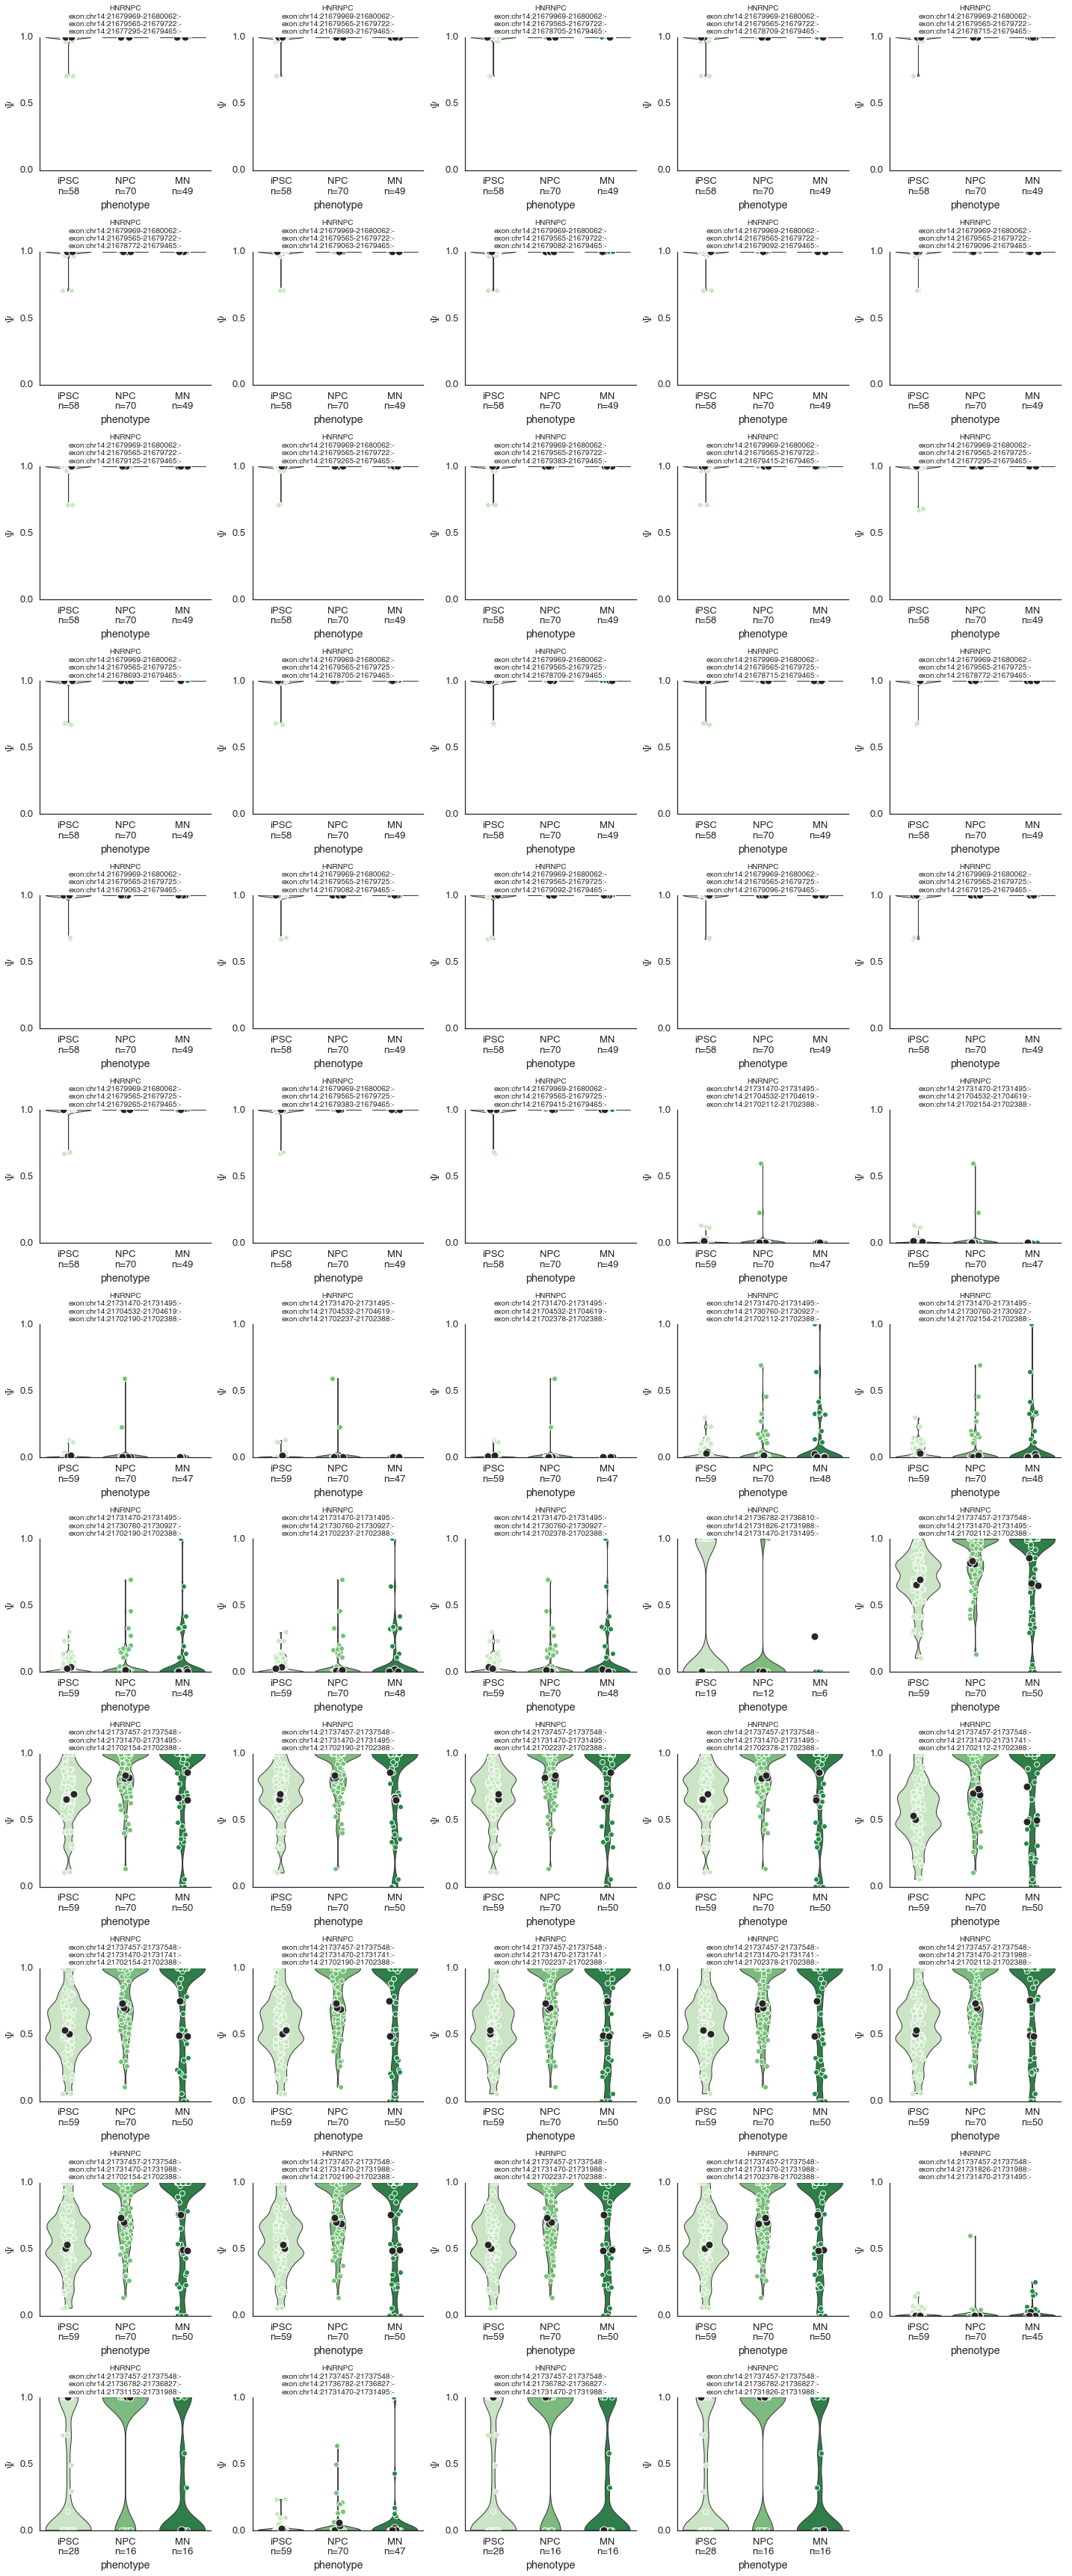

In [32]:
study.plot_event("HNRNPC")

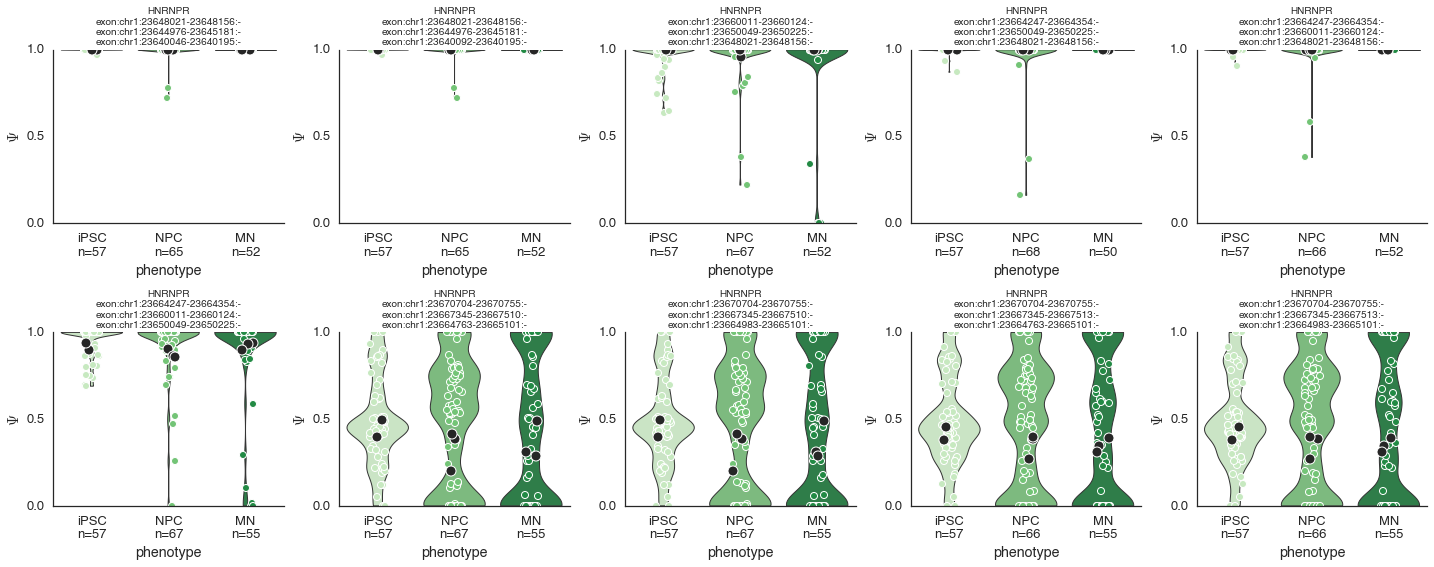

In [33]:
study.plot_event("HNRNPR")

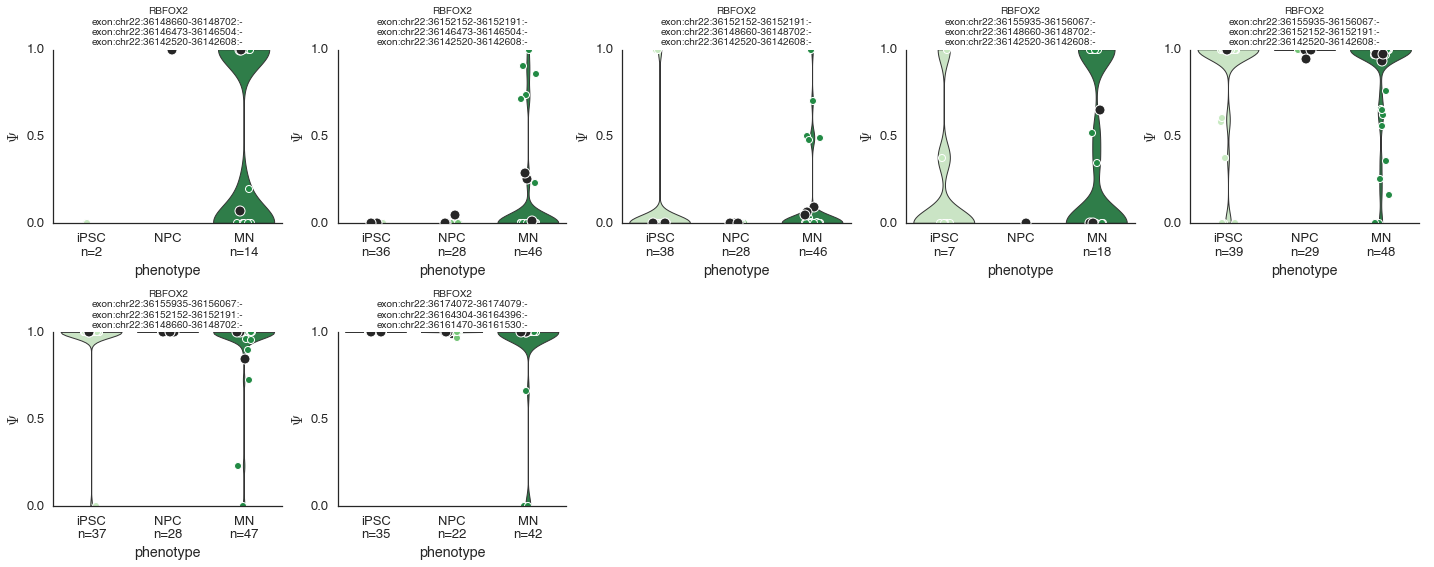

In [34]:
study.plot_event("RBFOX2")